In [2]:
from pathlib import Path
from test_setup import *
from network import *

In [3]:
# Learning rate
c = 0.1

# Input vectors
p = [
    [-1,-1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1],
    [-1, 1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1],
    [ 1, 1, 1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1],
    [-1,-1,-1,-1,-1,-1, 1, 1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1,-1,-1,-1, 1],
    [ 1,-1,-1,-1,-1, 1,-1, 1,-1,-1, 1, 1, 1, 1, 1,-1,-1, 1,-1,-1,-1,-1, 1,-1],
    [-1, 1,-1,-1,-1, 1,-1, 1,-1,-1, 1, 1, 1, 1,-1,-1,-1, 1,-1,-1,-1,-1, 1,-1]
]

# Desired output vectors
d = [
    [1, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 1]
]

In [4]:
def mse(y_true, y_pred, n):
    result = 0
    for i in range(len(y_true)):
        result += (y_true[i] - y_pred[i])**2

    return result/n

In [5]:
nn = Network(
    layer_sizes=[len(p[0]), 3, 3],
    active=Activation.logistic,
    learn=LearningRule.gradient,
    loss="cross-entropy",
    random_seed=42
)

In [6]:
cycle_error = []

In [ ]:
# TRAINING
for epoch in range(1000):
    total_loss = 0
    for i in range(len(p)):
        x = p[i]         # input char one-hot

        nn.train(x, d[i], 0.001, 0.9)
        y_pred  = nn.predict(x)
        total_loss += mse(d[i], y_pred, len(d[i]))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {total_loss}")

    cycle_error.append(total_loss)

Epoch 0, Loss 2.174882445449047
Epoch 100, Loss 1.5027213101559649
Epoch 200, Loss 1.3353164306206358
Epoch 300, Loss 1.2967731486594705
Epoch 400, Loss 1.2743550580741603
Epoch 500, Loss 1.2462517860040419
Epoch 600, Loss 1.2034039034283204
Epoch 700, Loss 1.1379960004813072
Epoch 800, Loss 1.0507326706239515
Epoch 900, Loss 0.9552951521494059


In [8]:
import matplotlib.pyplot as plt

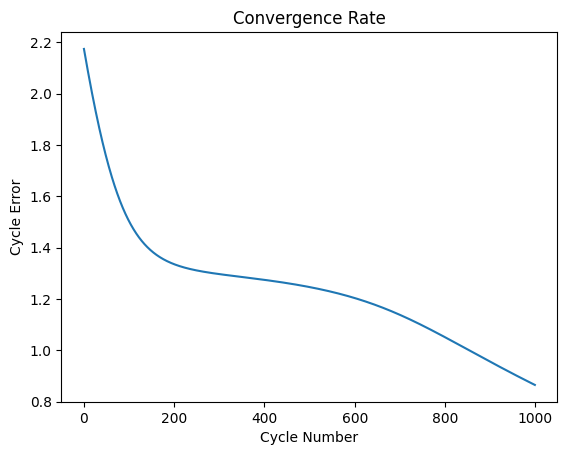

In [9]:
plt.plot(cycle_error)
plt.title("Convergence Rate")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Error")
plt.show()